# Borderline-SMOTE

Creates new samples by interpolation of samples of the minority class and its closest neighbours. It does not use all observations from the minority class as templates, like SMOTE does. Instead, it first selects observations which neighbours are mostly from the majority class, and then uses these as templates for the synthetic data generation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import BorderlineSMOTE

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [2]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

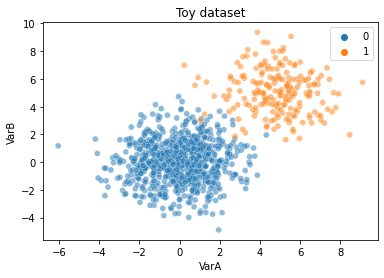

In [3]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## BorderlineSMOTE

https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.BorderlineSMOTE.html

In [4]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-1',
    n_jobs=4
)

X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

In [5]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    m_neighbors=10,
    kind='borderline-2',
    n_jobs=4
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)

In [6]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# size of undersampled data

X_res_b1.shape, y_res_b1.shape

((1600, 2), (1600,))

In [8]:
# size of undersampled data

X_res_b2.shape, y_res_b2.shape

((1599, 2), (1599,))

In [9]:
# number of minority class observations

y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()

(0    800
 1    200
 dtype: int64,
 1    800
 0    800
 dtype: int64,
 0    800
 1    799
 dtype: int64)

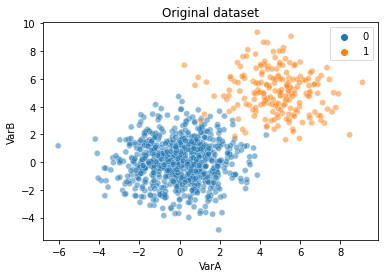

In [10]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

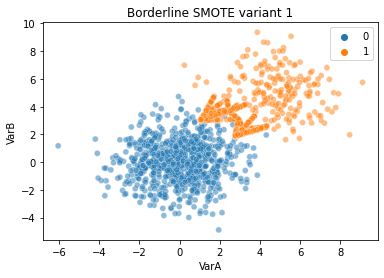

In [11]:
# plot of original data

sns.scatterplot(
    data=X_res_b1, x="VarA", y="VarB", hue=y_res_b1, alpha=0.5
)

plt.title('Borderline SMOTE variant 1')
plt.show()

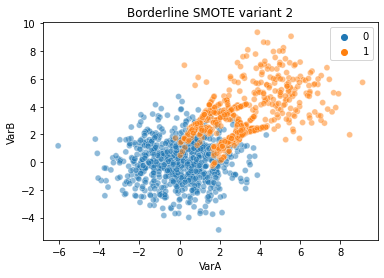

In [12]:
# plot of original data

sns.scatterplot(
    data=X_res_b2, x="VarA", y="VarB", hue=y_res_b2, alpha=0.5
)

plt.title('Borderline SMOTE variant 2')
plt.show()

We can see that if we use the variant 2, we create more synthetic data towards the majority class.

**HOMEWORK**

- Test Borderline SMOTE using the toy datasets that we created for section 4 and see how the distribution of the newly created data varies with the different separateness of the classes. 